# Leveraging Machine Learning Algorithms to predict AirBnb Listing Price

In [86]:
#importing pandas
import pandas as pd

## Importing Data

In [87]:
#connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# from pandas.core.arrays.datetimes import DataFrame
# Set the directory where the images are stored
dir = '/content/drive/My Drive/SML Airbnb' #Pass your own folder path here
## Download the csv "Airbnb_Listings.csv" from Kaggle and save it to your Google Drive directory
## Make sure to adjust other paths in this code accordingly
df=pd.read_csv(dir+'/Airbnb_Listings.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20200530151957,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.17
4,37512,https://www.airbnb.com/rooms/37512,20200530151957,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,none,Our community is a safe environment and at nig...,...,f,f,moderate,t,t,2,0,2,0,1.53


## Feature Selection

We found the below columns to be useful for the analysis based on the business knowledge and filtering just for those columns

In [89]:
col_lists = ['neighbourhood_cleansed','property_type',
            'room_type', 'accommodates','bathrooms','bedrooms','beds','bed_type','price',
             'host_is_superhost','square_feet','security_deposit','instant_bookable','cancellation_policy',
             'review_scores_rating','review_scores_value','reviews_per_month','guests_included']

df_ml = df[col_lists].copy()
df_ml.rename({'neighbourhood_cleansed':'neighbourhood'},axis = 1,inplace = True)
df_ml.head()

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,host_is_superhost,square_feet,security_deposit,instant_bookable,cancellation_policy,review_scores_rating,review_scores_value,reviews_per_month,guests_included
0,Palo Alto,Villa,Private room,2,2.0,1.0,1.0,Real Bed,$90.00,t,NaN,$0.00,f,moderate,96.0,10.0,0.57,1
1,Santa Clara,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,$85.00,f,325.0,$700.00,f,moderate,87.0,9.0,0.08,1
2,Mountain View,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$65.00,f,NaN,"$1,000.00",f,strict_14_with_grace_period,90.0,10.0,0.11,1
3,Palo Alto,Villa,Private room,1,2.0,1.0,1.0,Real Bed,$99.00,t,NaN,$0.00,f,moderate,97.0,10.0,2.17,1
4,San Jose,Bungalow,Private room,2,1.0,1.0,1.0,Real Bed,$52.00,t,NaN,NaN,f,moderate,94.0,9.0,1.53,1


In [90]:
df_ml.isnull().sum()

neighbourhood              0
property_type              0
room_type                  0
accommodates               0
bathrooms                  1
bedrooms                   6
beds                      68
bed_type                   0
price                      0
host_is_superhost          1
square_feet             7192
security_deposit        1457
instant_bookable           0
cancellation_policy        0
review_scores_rating    1367
review_scores_value     1370
reviews_per_month       1309
guests_included            0
dtype: int64

Since, there are a lot of blank values in the 'square_feet','security_deposit' and the 'reviews' related columns, we won't be proceeding ahead with these columns. 

In [91]:
col_lists = ['neighbourhood','property_type',
            'room_type', 'accommodates','bathrooms','bedrooms','beds','bed_type','price',
            'host_is_superhost','instant_bookable','cancellation_policy','guests_included']

df_ml1 = df_ml[col_lists].copy()
df_ml1.head()

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,host_is_superhost,instant_bookable,cancellation_policy,guests_included
0,Palo Alto,Villa,Private room,2,2.0,1.0,1.0,Real Bed,$90.00,t,f,moderate,1
1,Santa Clara,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,$85.00,f,f,moderate,1
2,Mountain View,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$65.00,f,f,strict_14_with_grace_period,1
3,Palo Alto,Villa,Private room,1,2.0,1.0,1.0,Real Bed,$99.00,t,f,moderate,1
4,San Jose,Bungalow,Private room,2,1.0,1.0,1.0,Real Bed,$52.00,t,f,moderate,1


## Data Cleaning

In [92]:
df_ml1.isnull().sum()

neighbourhood           0
property_type           0
room_type               0
accommodates            0
bathrooms               1
bedrooms                6
beds                   68
bed_type                0
price                   0
host_is_superhost       1
instant_bookable        0
cancellation_policy     0
guests_included         0
dtype: int64

since, there are very few NA's, we will dropping them

In [93]:
df_ml1 = df_ml1.dropna()

In [94]:
#converting price to numerical and allowing extra_people to categorical
df_ml1["price"] = df_ml1["price"].apply(lambda x: float(x.replace("$", "").replace(",", "")))
# df_ml1["extra_people"] = df_ml1["extra_people"].apply(lambda x: float(x.replace("$", "").replace(",", "")))


## Co-relation between the Features and Output 

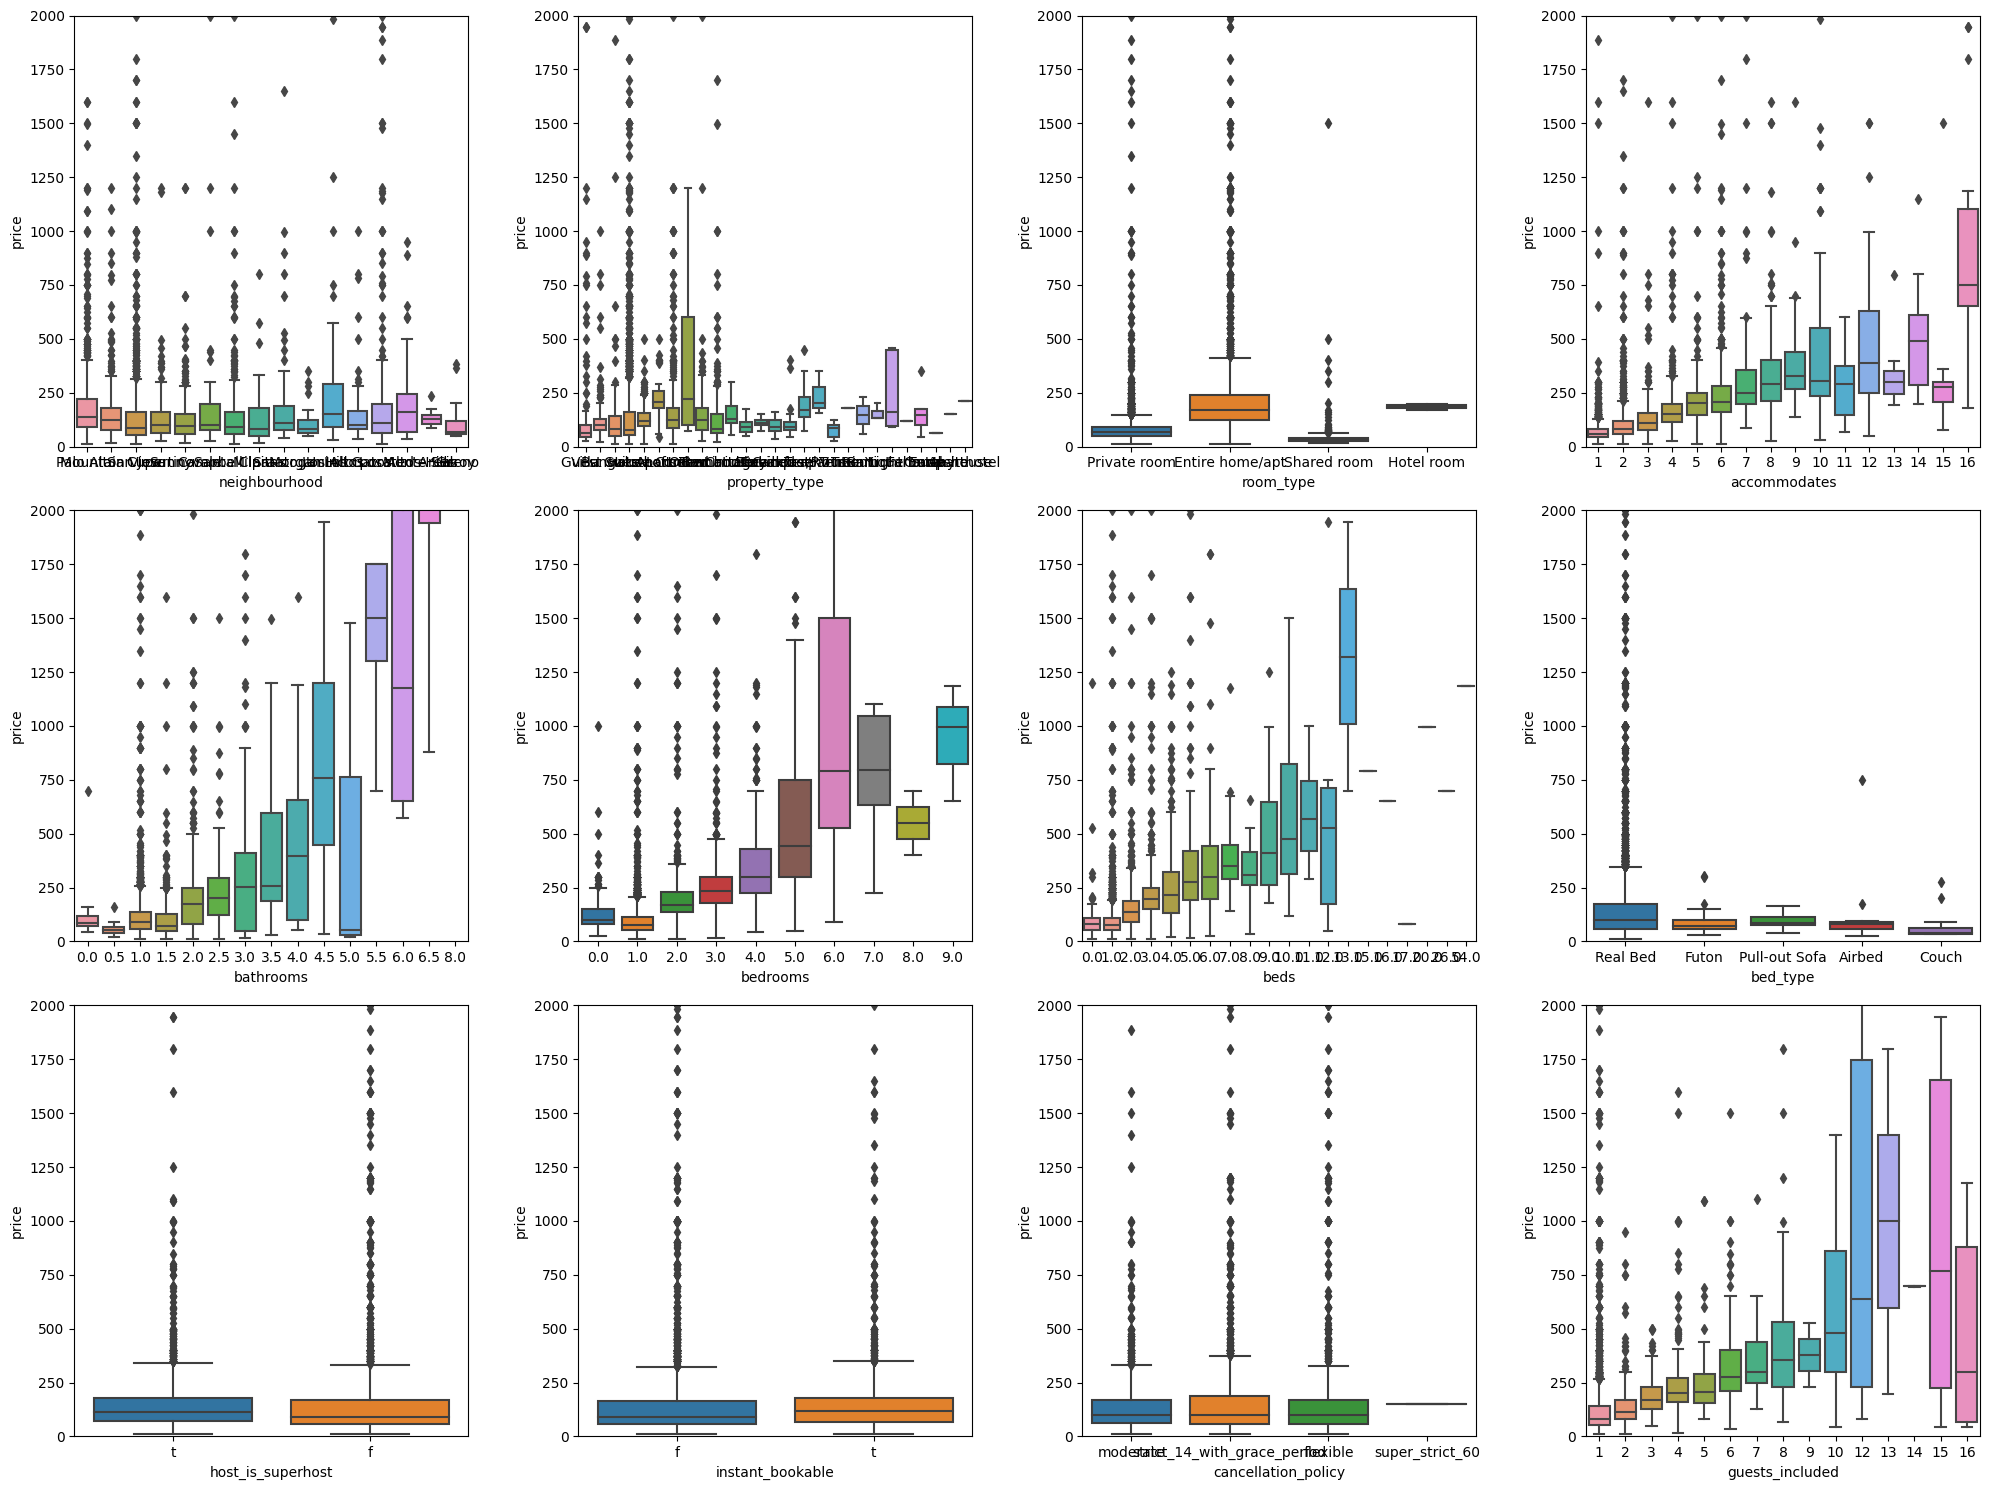

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical variables
cat_vars = ['neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'host_is_superhost', 
            'instant_bookable', 'cancellation_policy', 'guests_included']

# Create a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the grid into a 1D array
axs = axs.flatten()

# Loop over the categorical variables and create a box plot in each subplot
for i, var in enumerate(cat_vars):
    sns.boxplot(x=var, y='price', data=df_ml1, ax=axs[i])
    axs[i].set_ylim(0, 2000)  # set the y-limits for the current subplot

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

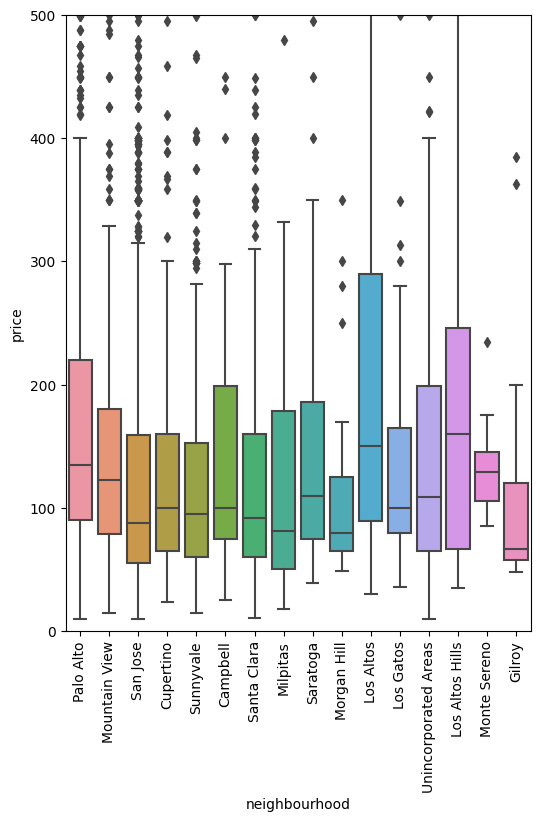

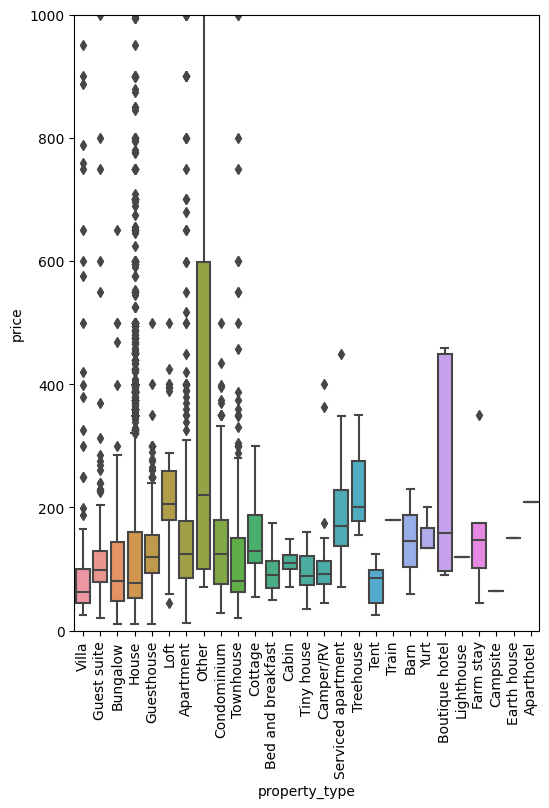

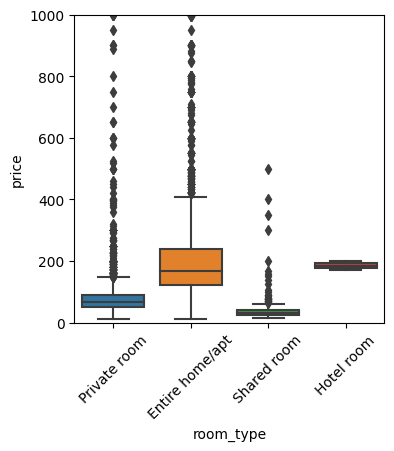

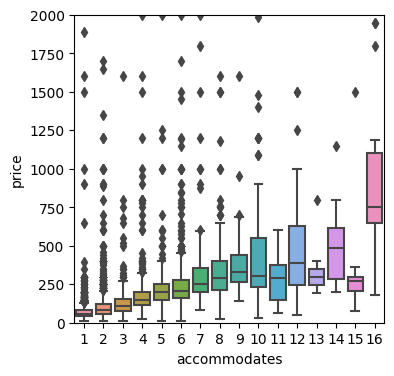

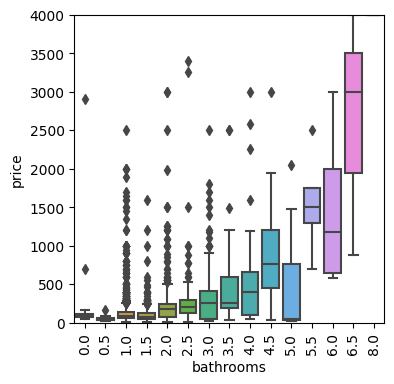

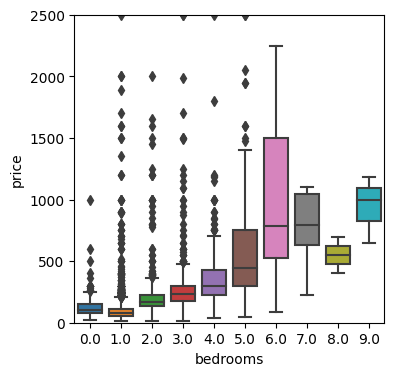

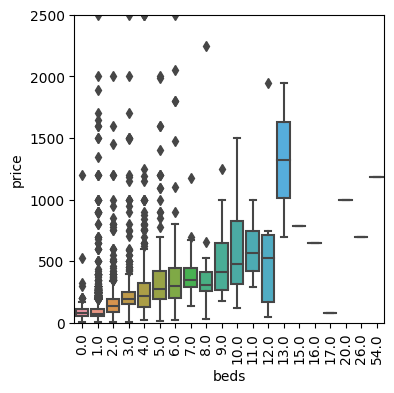

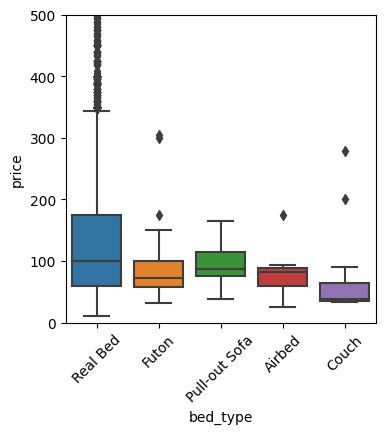

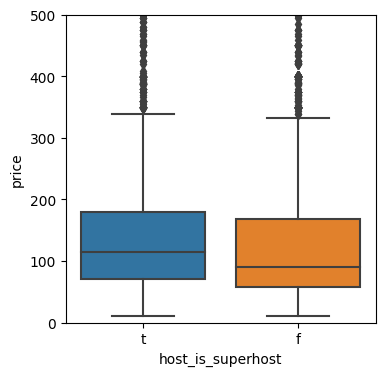

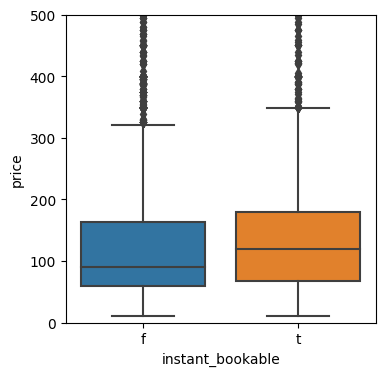

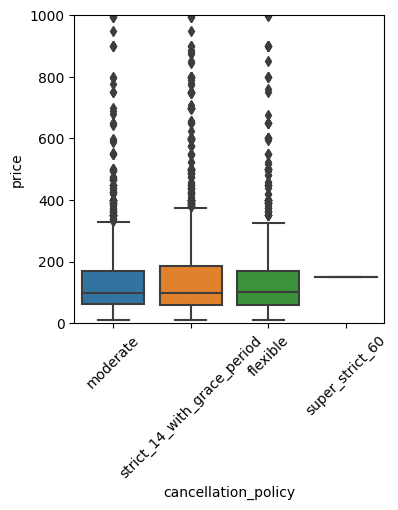

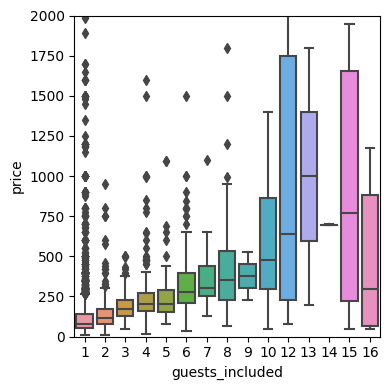

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical variables
cat_vars = ['neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
            'host_is_superhost', 'instant_bookable', 'cancellation_policy','guests_included']

# Define a dictionary that maps each categorical variable to a tuple of y-limits, rotation, and size
params_dict = {'neighbourhood': {'ylim': (0, 500), 'rotation': 90, 'size': (6, 8)},
               'property_type': {'ylim': (0, 1000), 'rotation': 90, 'size': (6, 8)},
               'room_type': {'ylim': (0, 1000), 'rotation': 45, 'size': (4, 4)},
               'accommodates': {'ylim': (0, 2000), 'rotation': 0, 'size': (4, 4)},
               'bathrooms': {'ylim': (0, 4000), 'rotation': 90, 'size': (4, 4)},
               'bedrooms': {'ylim': (0, 2500), 'rotation': 0, 'size': (4, 4)},
               'beds': {'ylim': (0, 2500), 'rotation': 90, 'size': (4, 4)},
               'bed_type': {'ylim': (0, 500), 'rotation': 45, 'size': (4, 4)},
               'host_is_superhost': {'ylim': (0, 500), 'rotation': 0, 'size': (4, 4)},
               'instant_bookable': {'ylim': (0, 500), 'rotation': 0, 'size': (4, 4)},
               'cancellation_policy': {'ylim': (0, 1000), 'rotation': 45, 'size': (4, 4)},
               'guests_included': {'ylim': (0, 2000), 'rotation': 0, 'size': (4,4)}}

# Loop over the categorical variables and create a box plot for each variable
for var in cat_vars:
    fig, ax = plt.subplots(figsize=params_dict[var]['size'])
    sns.boxplot(x=var, y='price', data=df_ml1, ax=ax)
    if var in params_dict:
        ax.set_ylim(params_dict[var]['ylim'])  # set the y-limits for the current subplot
        ax.tick_params(axis='x', labelrotation=params_dict[var]['rotation'])  # set the x-axis rotation for the current subplot
plt.tight_layout()
plt.show()


In [97]:
df_ml1.corr()

<ipython-input-97-7c7e02e66dc4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ml1.corr()


,accommodates,bathrooms,bedrooms,beds,price,guests_included
accommodates,1.000000,0.580940,0.819393,0.789442,0.297759,0.622465
bathrooms,0.580940,1.000000,0.664988,0.556387,0.263990,0.362602
bedrooms,0.819393,0.664988,1.000000,0.751982,0.308296,0.550141
beds,0.789442,0.556387,0.751982,1.000000,0.253247,0.529717
price,0.297759,0.263990,0.308296,0.253247,1.000000,0.196353
guests_included,0.622465,0.362602,0.550141,0.529717,0.196353,1.000000


In [98]:
# We drop Beds and Bedrooms variables due to their high covariance with accomodates and with each other
df_ml1.drop(['beds', 'bedrooms'], axis =1, inplace = True)

## Target Variable Distribution

In [99]:
df_ml1.describe()

,accommodates,bathrooms,price,guests_included
count,7146.000000,7146.00000,7146.000000,7146.000000
mean,3.126644,1.38616,161.856003,1.704310
std,2.374119,0.69070,353.008768,1.620297
min,1.000000,0.00000,10.000000,1.000000
25%,2.000000,1.00000,60.000000,1.000000
50%,2.000000,1.00000,100.000000,1.000000
75%,4.000000,2.00000,175.000000,2.000000
max,16.000000,8.00000,10000.000000,16.000000


Finally, we are going ahead with the above mentioned varaibles as we could see significant co-relation of each variables with the output variable

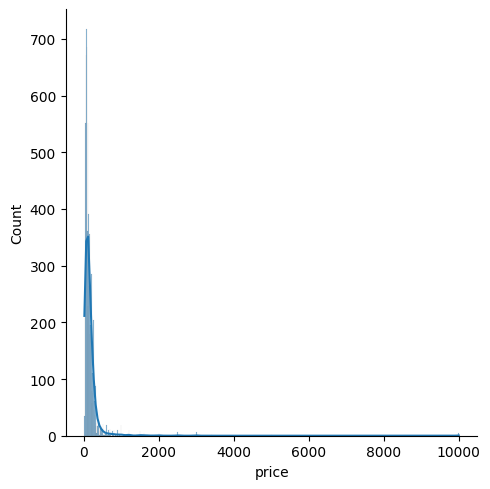

In [100]:
sns.displot(df_ml1['price'], kde=True)

We can see the distribution of house prices to be right skewed - the mean($160) is higher than median(100), with few having very high prices. 

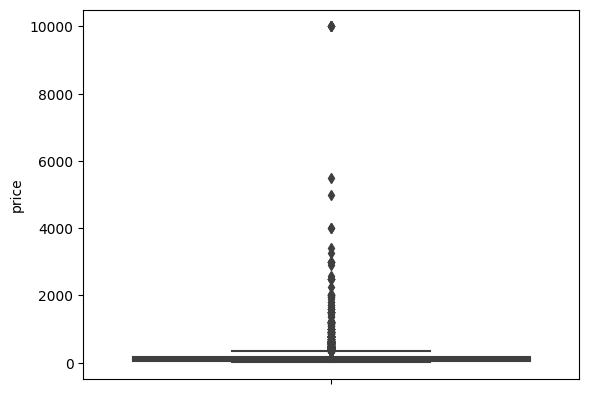

In [101]:
sns.boxplot(y=df_ml1['price'])
plt.show()

The 25th percentile price is '60 dollars' and 75th percentile is '175 dollars', and there are good number of listings priced beyond the Inter Quartile Range. Creating bins to have a better visualization of how the data is distributed

In [102]:
# Bucket numerical variable into categories
df_ml1['category'] = pd.cut(df_ml1['price'], bins=[0, 10, 25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], labels=['0-10','11-25','26-50','51-100','101-200', '201-300', '301-400', '401-500','501-600','601-700','701-800','801-900','901-1000'])

# Count occurrences in each category
category_counts = df_ml1['category'].value_counts()

# Show category counts
print(category_counts)
sum(category_counts)

51-100      2568
101-200     2160
26-50       1037
201-300      756
301-400      195
11-25        122
401-500       88
501-600       38
701-800       29
601-700       27
901-1000      21
801-900       16
0-10          10
Name: category, dtype: int64


7067

In [103]:
#dropping the category column as we already have the price column
df_ml1 = df_ml1.drop('category', axis=1)

In [104]:
# Some of the prices over 500 are extremely high, and may intercept with fitting
# dropping these data gets rids of 5% of the total data
# 3 rows with price as 0 are probably mistakes, we'll drop them
# Encode the categorical data as one hot
df_ml2 = pd.get_dummies(df_ml1, columns = ['host_is_superhost','instant_bookable','neighbourhood','property_type','room_type','bed_type','cancellation_policy'],drop_first = True)
new_df = df_ml2.query('price <= 500 and price > 0')
new_df

,accommodates,bathrooms,price,guests_included,host_is_superhost_t,instant_bookable_t,neighbourhood_Cupertino,neighbourhood_Gilroy,neighbourhood_Los Altos,neighbourhood_Los Altos Hills,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60
0,2,2.0,90.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2,1.0,65.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,2.0,99.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,2,1.0,52.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
5,2,1.0,110.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,1,1.0,49.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7217,4,1.0,135.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7218,1,1.0,85.0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7219,1,1.0,49.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


We can remove the observation with price equal to 0 (which could be due to manual error) and greater than 500 to avoid the outliers disrupting the model fit. We also hot encode the label so that the categorical variables can be dealt my the ML models that we will using furhter

## Data Modelling

In [105]:
from sklearn.model_selection import train_test_split
X = new_df.drop('price', axis = 1)
y = new_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [106]:
print(new_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6936, 57)
(4855, 56)
(2081, 56)
(4855,)
(2081,)


## Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))


Mean Squared Error: 3102.38
Mean Absolute Error: 38.57
R2 Score: 0.6011


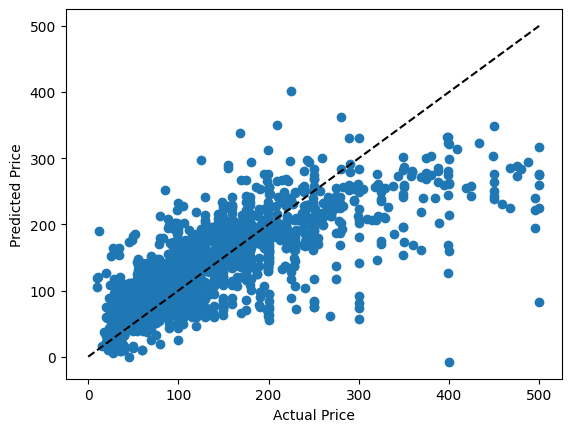

In [108]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the decision tree regressor
regressor = DecisionTreeRegressor()

# Fit the decision tree on the train data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 4419.26
Mean Absolute Error: 40.84
R2 Score: 0.4318


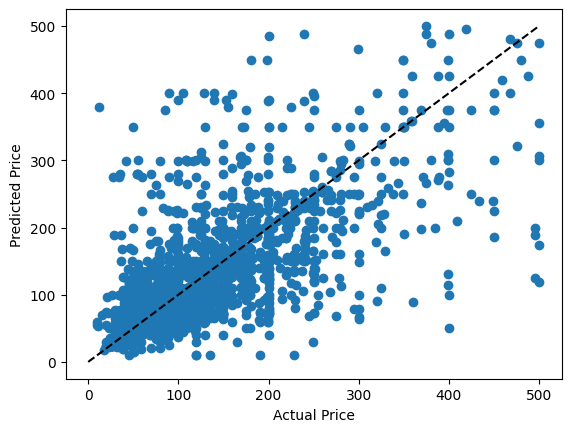

In [110]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Decison Tree (Pruned)

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the decision tree regressor
regressor = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 4, min_samples_split = 2)

# Fit the decision tree on the train data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 3173.44
Mean Absolute Error: 37.74
R2 Score: 0.5920


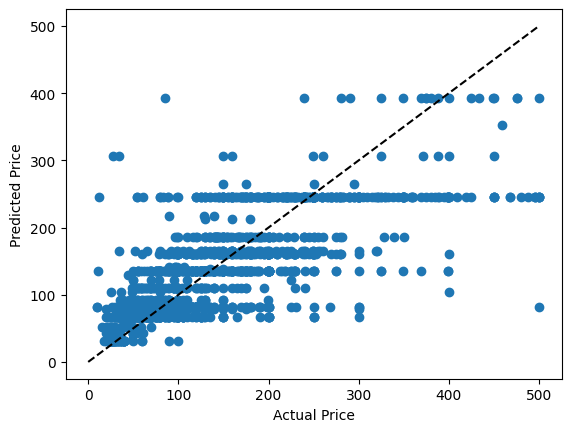

In [112]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
import math

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = new_df.drop('price', axis = 1)
y = new_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initialize and fit the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 2974.57
Mean Absolute Error: 35.42
R2 Score: 0.6176


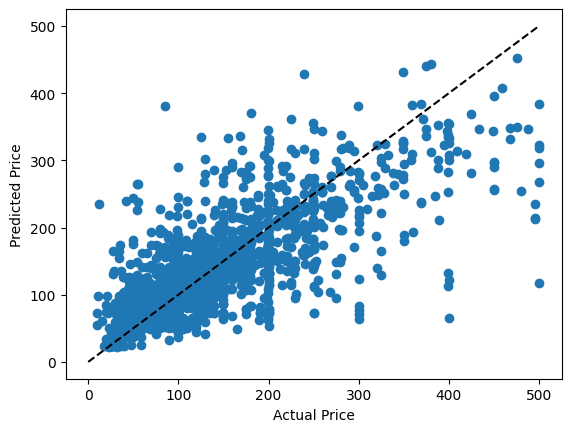

In [114]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Random Forest (Pruned)

In [115]:
from sklearn.ensemble import RandomForestRegressor
import math

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = new_df.drop('price', axis = 1)
y = new_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initialize and fit the Random Forest model
rf = RandomForestRegressor(max_depth = 20, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 300)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 2744.98
Mean Absolute Error: 34.76
R2 Score: 0.6471


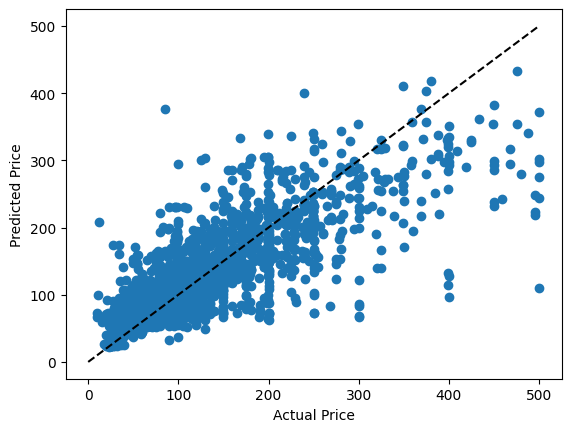

In [116]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 2749.00
Mean Absolute Error: 35.74
R2 Score: 0.6466


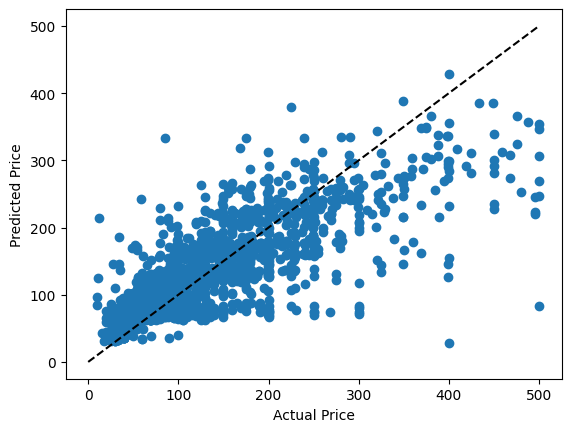

In [118]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Gradient Boost (Pruned)

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5, n_estimators = 500, random_state = 42, subsample = 0.8)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 2631.61
Mean Absolute Error: 34.82
R2 Score: 0.6617


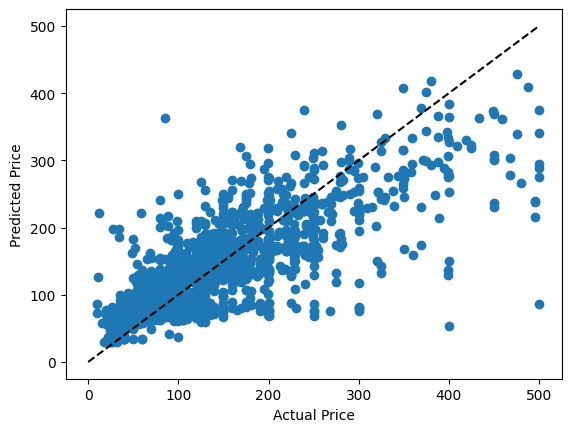

In [120]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## XGBoost

In [121]:
import xgboost as xgb

# Initialize and fit the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 2828.77
Mean Absolute Error: 34.85
R2 Score: 0.6363


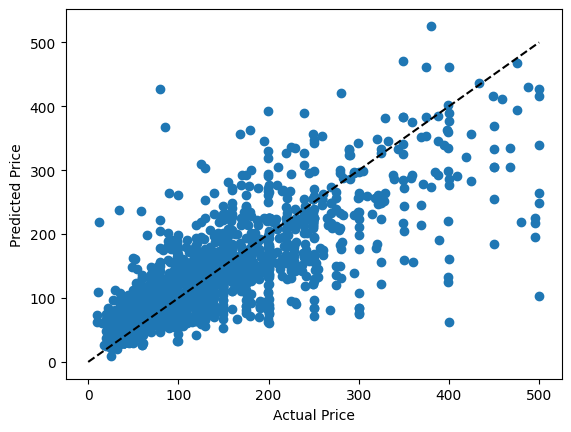

In [122]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## XG Pruned

In [123]:
import xgboost as xgb

# Initialize and fit the XGBoost model
xgb_model = xgb.XGBRegressor(colsample_bytree = 0.9, learning_rate = 0.01, max_depth = 5, n_estimators = 500, random_state = 42, subsample = 0.8)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 2607.10
Mean Absolute Error: 34.52
R2 Score: 0.6648


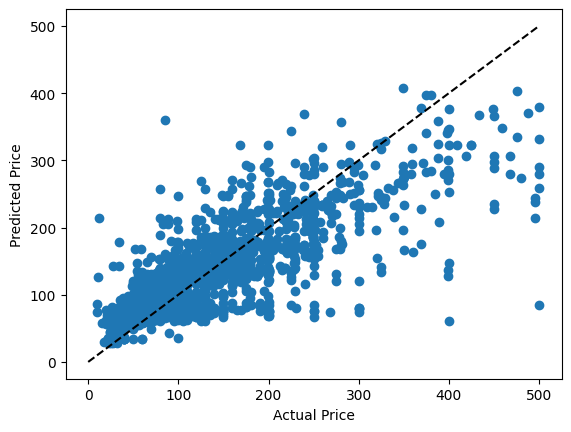

In [125]:
plt.scatter(y_test,y_pred)
plt.plot([0,500],[0,500],'--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Neural Network

In [143]:
# Split the data into training and test sets
train_dataset = new_df.sample(frac=0.7, random_state=42)
test_dataset = new_df.drop(train_dataset.index)

# Create the input and target tensors
x_train = train_dataset.drop(['property_type_Earth house','property_type_Barn','property_type_Campsite','property_type_Train','price','room_type_Hotel room','cancellation_policy_super_strict_60'], axis=1).values
y_train = train_dataset['price'].values
x_test= test_dataset.drop(['property_type_Earth house','property_type_Barn','property_type_Campsite','property_type_Train','price','room_type_Hotel room','cancellation_policy_super_strict_60'], axis=1).values
y_test = test_dataset['price'].values

In [141]:
train_dataset.sum()

accommodates                                        14524.0
bathrooms                                            6555.0
price                                              604237.0
guests_included                                      7852.0
host_is_superhost_t                                  2236.0
instant_bookable_t                                   2171.0
neighbourhood_Cupertino                               223.0
neighbourhood_Gilroy                                   11.0
neighbourhood_Los Altos                                43.0
neighbourhood_Los Altos Hills                          28.0
neighbourhood_Los Gatos                                56.0
neighbourhood_Milpitas                                207.0
neighbourhood_Monte Sereno                              7.0
neighbourhood_Morgan Hill                              29.0
neighbourhood_Mountain View                           450.0
neighbourhood_Palo Alto                               504.0
neighbourhood_San Jose                  

In [144]:
# Normalize the inputs
max = x_train.max(axis=0)
min = x_train.min(axis=0)
# std = x_train.std(axis=0)
x_train= (x_train - min) /(max-min)
x_test = (x_test- min) /(max-min)

In [145]:
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD , Adam


# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=[x_train.shape[1]],kernel_initializer='he_normal',name='input'),
    Dropout(rate=0.1,name='drop1'),
    Dense(32, activation='relu',kernel_initializer='he_normal',name='dense1'),
    Dropout(rate=0.1,name='drop2'),
    Dense(1,name='output')
])

# Compile the model
OPTIMIZER=Adam(learning_rate=0.01)
model.compile(optimizer=OPTIMIZER, loss='mean_squared_error')

model.summary()


# model = Sequential([
#     Dense(64, activation = 'relu', input_shape = (77,)),
#     Dropout(0.1),
#     Dense(32, activation = 'relu'),
#     Dropout(0.1),
#     Dense(1)
# ])
# opt = Adam(learning_rate = 0.001)
# model.compile(loss = 'mean_squared_error', optimizer = opt)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                3264      
                                                                 
 drop1 (Dropout)             (None, 64)                0         
                                                                 
 dense1 (Dense)              (None, 32)                2080      
                                                                 
 drop2 (Dropout)             (None, 32)                0         
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [146]:
# Train the model
# X_train.shape

history = model.fit(x_train,y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)

# X_val, X_test2, y_val, y_test2 = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
# hist = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_val, y_val),
#                 verbose = 0)
# y_pred2 = model.predict(X_test2)

Epoch 1/100
76/76 [==============================] - 1s 6ms/step - loss: 11047.0479 - val_loss: 4517.5488
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 3861.7817 - val_loss: 3212.9211
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 3321.2546 - val_loss: 3113.3801
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 3254.8523 - val_loss: 3064.9927
Epoch 5/100
76/76 [==============================] - 0s 3ms/step - loss: 3275.3997 - val_loss: 3122.8943
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 3239.6392 - val_loss: 3032.4985
Epoch 7/100
76/76 [==============================] - 0s 4ms/step - loss: 3128.0305 - val_loss: 3018.5693
Epoch 8/100
76/76 [==============================] - 0s 3ms/step - loss: 3146.6255 - val_loss: 3088.1030
Epoch 9/100
76/76 [==============================] - 0s 4ms/step - loss: 3109.0884 - val_loss: 3042.3936
Epoch 10/100
76/76 [==============================] - 

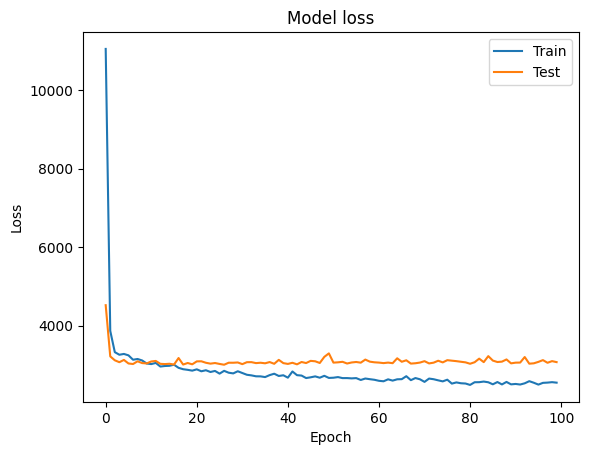

In [147]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

66/66 [==============================] - 0s 2ms/step


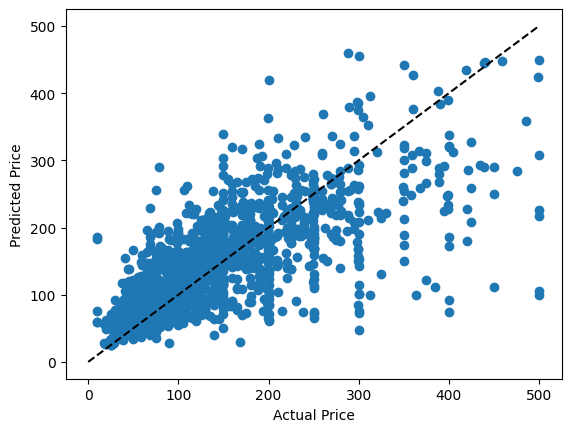

In [148]:
y_pred = model.predict(x_test)

import matplotlib.pyplot as plt

# Plot the actual vs predicted target values
plt.scatter(y_test, y_pred)
plt.plot([0, 500], [0, 500], '--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [150]:
# from sklearn import metrics
# import numpy as np


# print('MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
# print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# print('R2 score = ', '{:.3f}'.format(metrics.r2_score(y_test, y_pred)))



# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.4f}".format(r2))

Mean Squared Error: 3066.88
Mean Absolute Error: 36.74
R2 Score: 0.5809
